**PROYECTO REGRESION LINEAL**

Diana Florez Aza

**1. Introduccion**

**1.1. ¿Qué es la regresión lineal?**

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es “dibujar una recta” que nos indicará la tendencia de un conjunto de datos continuos (si fueran discretos, utilizaríamos Regresión Logística). En estadísticas, regresión lineal es una aproximación para modelar la relación entre una variable escalar dependiente "y" y una o mas variables explicativas nombradas con "X".

La fórmula de la recta es: $$ Y = mX + b $$

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el "punto de corte con el eje Y" en la gráfica (cuando X=0)

**1.2. ¿Cómo funciona el algoritmo de regresión lineal en Machine Learning?**

Los algoritmos de Machine Learning Supervisados, aprenden por sí mismos y -en este caso- a obtener automáticamente esa "recta" que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor "Y" de salida real. El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima. Hay diversos métodos para conseguir minimizar el coste. Lo más común es utilizar una versión vectorial y la llamada Ecuación Normal que nos dará un resultado directo.

NOTA: cuando se habla de "recta" es en el caso particular de regresión lineal simple. Si hubiera más variables, hay que generalizar el término.

En **Regresion con Multiples Variables** se extiende el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pues de esta manera podremos obtener predicciones más complejas.

Nuestra "ecuación de la Recta", ahora pasa a ser:

$$Y = b + m1 X1 + m2 X2 + … + m(n) X(n)$$

**2. Breve Historia**

La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados, y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio. La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística. [blue_text](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

**3. El planteamiento del algortimo**

El objetivo del analisis es encontrar el planteamiento matematicos que mejor prediga los precios de las viviendas en funcion de las variables predictoras de cada una de las viviendas siendo estos:

* Edad de la casa
* Distancia a la estacion de metro mas cercana
* Numero de tiendas
* Area
* Latitud
* Longitud

En este caso utilizariamos un modelo de Regresion Lineal Multiple con la siguiente forma en el que necesitamos encontrar los valores de los parametros

$$Y = b + m1 X1 + m2 X2 + m3 X3 + m4 X4 + m5 X5 + m6 X6$$


**4. Ejemplo**

Este conjunto de datos inmobiliarios incluye la fecha de compra, la edad de la casa, la ubicación, la distancia a la estación de MRT más cercana y el precio de la casa por unidad de superficie. [blue_text](https://www.kaggle.com/quantbruce/real-estate-price-prediction)

In [1]:
import pandas as pd
df = pd.read_csv('Real estate.csv', index_col=0)

# Show dataframe
df.head(4)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


In [2]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [3]:
df.columns = df.columns.str.replace(' ', '') 
df.columns

Index(['X1transactiondate', 'X2houseage', 'X3distancetothenearestMRTstation',
       'X4numberofconveniencestores', 'X5latitude', 'X6longitude',
       'Yhousepriceofunitarea'],
      dtype='object')

In [4]:
import sklearn as skl
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [5]:
Y=df.xs('Yhousepriceofunitarea', axis=1)
X1=df.xs('X2houseage', axis=1)
X2=df.xs('X3distancetothenearestMRTstation', axis=1)
X3=df.xs('X4numberofconveniencestores', axis=1)
X4=df.xs('X5latitude', axis=1)
X5=df.xs('X6longitude', axis=1)
print(Y.head(2))
print(X1.head(2))
print(X2.head(2))
print(X3.head(2))
print(X4.head(2))
print(X5.head(2))

No
1    37.9
2    42.2
Name: Yhousepriceofunitarea, dtype: float64
No
1    32.0
2    19.5
Name: X2houseage, dtype: float64
No
1     84.87882
2    306.59470
Name: X3distancetothenearestMRTstation, dtype: float64
No
1    10
2     9
Name: X4numberofconveniencestores, dtype: int64
No
1    24.98298
2    24.98034
Name: X5latitude, dtype: float64
No
1    121.54024
2    121.53951
Name: X6longitude, dtype: float64


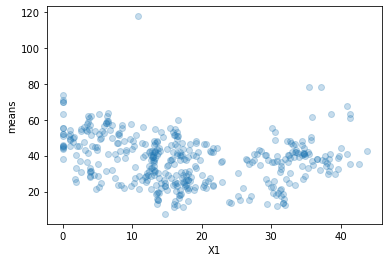

La correlación de Yhousepriceofunitarea y X2houseage es: -0.2105670462772168


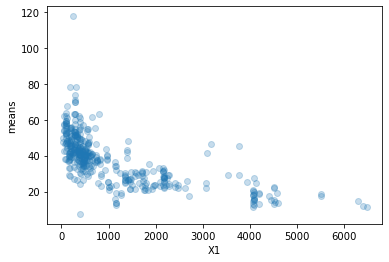

La correlación de Yhousepriceofunitarea y X3distancetothenearestMRTstation es: -0.6736128553689182


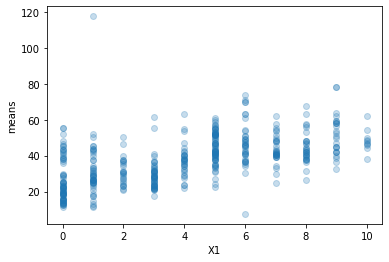

La correlación de Yhousepriceofunitarea y X4numberofconveniencestores es: 0.5710049111111482


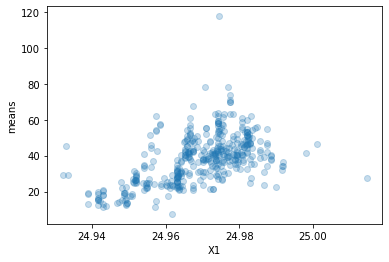

La correlación de Yhousepriceofunitarea y X5latitude es: 0.5463066525035892


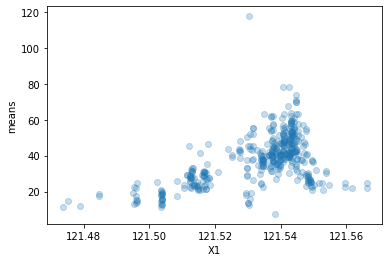

La correlación de Yhousepriceofunitarea y X6longitude es: 0.523286507028773


In [6]:
def relation_rm_medv(X1, means):
  plt.scatter(X1, means, alpha=0.25)
  plt.xlabel("X1")
  plt.ylabel("means")
  plt.show()
  return np.corrcoef(X1, means)[0, 1]   #  se recibe uma matriz de correlaciones. Se xtrae la correlación

print("La correlación de Yhousepriceofunitarea y X2houseage es:", relation_rm_medv(X1, Y))
print("La correlación de Yhousepriceofunitarea y X3distancetothenearestMRTstation es:", relation_rm_medv(X2, Y))
print("La correlación de Yhousepriceofunitarea y X4numberofconveniencestores es:", relation_rm_medv(X3, Y))
print("La correlación de Yhousepriceofunitarea y X5latitude es:", relation_rm_medv(X4, Y))
print("La correlación de Yhousepriceofunitarea y X6longitude es:", relation_rm_medv(X5, Y))

Al analizar las relaciones de cada una de las variables explicativas contra la variable precio a traves del calculo de correlaciones y graficas de dispersion se observa que:

* A mayor valor de las siguientes variables, mayor valor del precio de las viviendas<br>
    * Numero de tiendas (0.57)<br>
    * Latitud (0.54)<br>
    * Longitud (0.52)<br>

* A mayor valos de las siguiente variables, menor valor del precio de las viviendas<br>
    * Edad de la casa (-0.21)<br>
    * Distancia a la estacion de metro mas cercana (-0.67)<br>

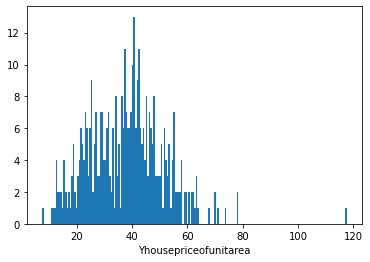

None


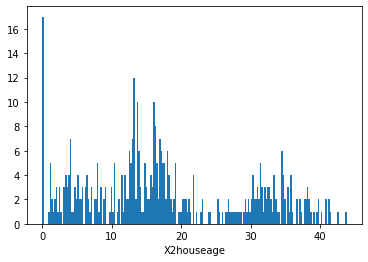

None


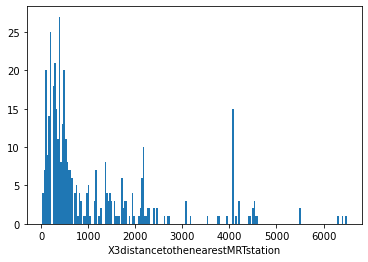

None


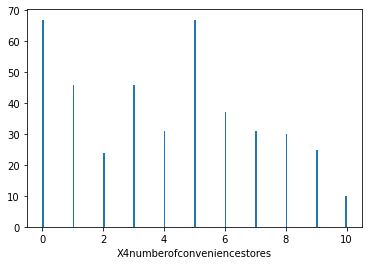

None


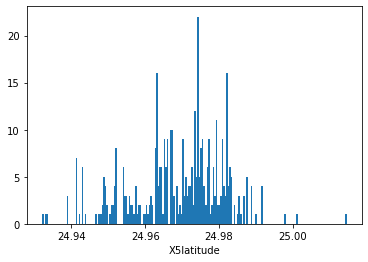

None


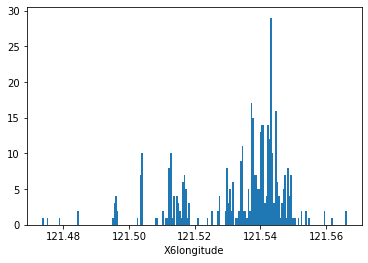

None


In [7]:
def medv_hist(medv,n,name):
  plt.hist(medv, bins=n)
  plt.xlabel(name)
  plt.show()
    
print(medv_hist(Y,200,"Yhousepriceofunitarea"))
print(medv_hist(X1,200,"X2houseage"))
print(medv_hist(X2,200,"X3distancetothenearestMRTstation"))
print(medv_hist(X3,200,"X4numberofconveniencestores"))
print(medv_hist(X4,200,"X5latitude"))
print(medv_hist(X5,200,"X6longitude"))

In [8]:
Y=df.xs('Yhousepriceofunitarea', axis=1)
X1=df.xs('X2houseage', axis=1)
X2=df.xs('X3distancetothenearestMRTstation', axis=1)
X3=df.xs('X4numberofconveniencestores', axis=1)
X4=df.xs('X5latitude', axis=1)
X5=df.xs('X6longitude', axis=1)

In [9]:
df.head(2)

,X1transactiondate,X2houseage,X3distancetothenearestMRTstation,X4numberofconveniencestores,X5latitude,X6longitude,Yhousepriceofunitarea
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [107]:
length = len(df)
train_len = int(0.7* length)
print(train_len)
test_len = int(0.3* length)
print(test_len)

train_set = df[0: train_len]
Y_train=train_set.xs('Yhousepriceofunitarea', axis=1)
test_set = df[train_len: train_len+test_len]
Y_test=test_set.xs('Yhousepriceofunitarea', axis=1)

289
124


In [108]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [148]:
x_train = train_set[['X3distancetothenearestMRTstation','X4numberofconveniencestores','X5latitude','X2houseage']]
model = linear_model.LinearRegression(fit_intercept=True).fit(x_train, Y_train) 
print("Coeficientes sklearn:", model.intercept_, model.coef_)
print("Error regresión lineal múltiple:", mean_squared_error(Y_train, model.predict(x_train)))

Coeficientes sklearn: -6957.532223523653 [-3.89540093e-03  1.11368537e+00  2.80376365e+02 -3.01681259e-01]
Error regresión lineal múltiple: 84.3875049793543


In [149]:
x_test = test_set[['X3distancetothenearestMRTstation','X4numberofconveniencestores','X5latitude','X2houseage']]
model_2 = model.fit(x_test, Y_test) 
print("Coeficientes sklearn:", model_2.intercept_, model_2.coef_)
print("Error regresión lineal múltiple:", mean_squared_error(Y_train, model_2.predict(x_train)))

Coeficientes sklearn: [-3460.51643524] [[-4.86865486e-03  1.19100802e+00  1.40236262e+02 -1.83579216e-01]]
Error regresión lineal múltiple: 88.56242099197128


In [150]:
y_predict = model.predict(x_test)
y_predict = pd.DataFrame(y_predict)
y_predict.head(5)

,0
0,44.864730
1,32.179079
2,46.859587
3,40.139488
4,44.969292


In [151]:
Y_test = pd.DataFrame(Y_test)
Y_test.head(5)

,Yhousepriceofunitarea
No,
290,44.5
291,37.0
292,54.4
293,24.5
294,42.5


In [152]:
import statsmodels.formula.api as sm
model2 = sm.ols('Yhousepriceofunitarea ~ X3distancetothenearestMRTstation + X4numberofconveniencestores + X5latitude + X2houseage', df).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5916.0065,1112.732,-5.317,0.000,-8103.394,-3728.619
X3distancetothenearestMRTstation,-0.0042,0.000,-8.473,0.000,-0.005,-0.003
X4numberofconveniencestores,1.1648,0.190,6.141,0.000,0.792,1.538
X5latitude,238.6357,44.561,5.355,0.000,151.039,326.233
X2houseage,-0.2687,0.039,-6.903,0.000,-0.345,-0.192


**5. Conclusiones**

Se observa en la medida del error cuadraticomedio que ha medida que se incluyen variables explicativas esta medida va disminuyendo considerablemente, ademas se encuntra que la diferencia entre el error en los datos de entrenamiento y validacion no es muy grande. Al probar con el metodo sm.ols se observa que la longitud no es significativa, al eliminar esta variable el intercepto se vuelve significativo y ademas se mantiene el error sin disminuir.

**6. Bibliografia**

* https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal
* https://www.kaggle.com/quantbruce/real-estate-price-prediction